In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image_dataset_from_directory
import os

import matplotlib.pyplot as plt

tf.config.list_physical_devices("GPU")

PATH = os.getcwd()
IMG_SIZE = (160, 160)


def get_val_dataset():
    validation_dir = os.path.join(PATH, "./test")
    validation_dataset = image_dataset_from_directory(
        validation_dir, shuffle=True, batch_size=203, image_size=IMG_SIZE
    )
    val_batches = tf.data.experimental.cardinality(validation_dataset)
    test_dataset = validation_dataset.take(val_batches // 5)
    validation_dataset = validation_dataset.skip(val_batches // 5)

    print(
        "Number of validation batches: %d"
        % tf.data.experimental.cardinality(validation_dataset)
    )
    AUTOTUNE = tf.data.AUTOTUNE
    validation_dataset = validation_dataset.prefetch(buffer_size=AUTOTUNE)
    return validation_dataset

In [2]:
model = tf.keras.models.load_model("./mobilenetv2_batch32.tf")
validation_dataset_prefetch = get_val_dataset()
loss, accuracy = model.evaluate(validation_dataset_prefetch)
print("Test accuracy :", accuracy)

Found 203 files belonging to 2 classes.
Number of validation batches: 1
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1/1 [==============================] - 3s 3s/step - loss: 0.5115 - accuracy: 0.7586
Test accuracy : 0.7586206793785095


Found 203 files belonging to 2 classes.
1


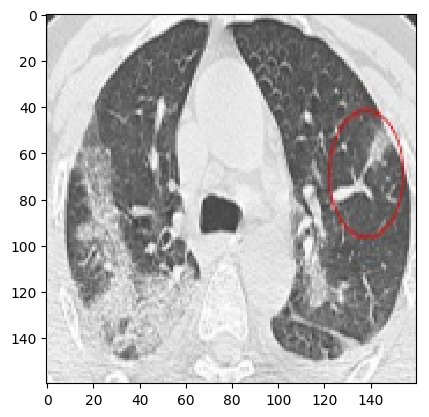

In [3]:
validation_dir = os.path.join(PATH, "./test")
validation_dataset = image_dataset_from_directory(
    validation_dir, shuffle=True, batch_size=203, image_size=IMG_SIZE
)
image_batch, label_batch = validation_dataset.as_numpy_iterator().next()

print(label_batch[1])
plt.imshow(image_batch[1].astype(np.uint8))
plt.show()

In [4]:
def predict_by_one(input_img_fl32):
    predictions = model.predict(input_img_fl32[np.newaxis, :, :, :])
    predictions = tf.nn.sigmoid(predictions)
    predictions = tf.where(predictions < 0.5, 0, 1)
    return predictions.numpy()

interpreter = tf.lite.Interpreter(model_path="./mobilenetv2_batch32.tflite")
interpreter.allocate_tensors()
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
prediction = predict_by_one_tflite(image_batch[i])[0][0]

def predict_by_one_tflite(input_img_fl32):
#     input_shape = input_details[0]["shape"]
    interpreter.set_tensor(
        input_details[0]["index"], input_img_fl32[np.newaxis, :, :, :]
    )
    interpreter.invoke()
    output_data = interpreter.get_tensor(output_details[0]["index"]) # [[-2.234]]
    predictions = tf.nn.sigmoid(output_data) # 0.2 , 0.4, 0.6
    predictions = tf.where(predictions < 0.5, 0, 1)
    return predictions.numpy()

In [5]:
import time

In [6]:
count=0
for i in range(len(label_batch)):
    before = time.time()
    prediction = predict_by_one(image_batch[i])[0][0]
    in_ms_inf = time.time() - before
    print(in_ms_inf)
    if prediction == label_batch[i]:
        count+=1
        print(count)
#     print(predict_by_one(image_batch[i])[0][0])
#     print(label_batch[i])

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
0.5137486457824707
1
0.032500505447387695
2
0.03205728530883789
3
0.03170299530029297
4
0.04198265075683594
5
0.0364537239074707
6
0.03728365898132324
7
0.03152108192443848
8
0.035926103591918945
9
0.031222105026245117
10
0.0343174934387207
0.03218388557434082
11
0.0335087776184082
12
0.03516554832458496
13
0.035971641540527344
14
0.04025673866271973
0.03588056564331055
15
0.

In [7]:
print("accuracy: ", (count/len(label_batch))*100)

accuracy:  75.86206896551724


In [8]:
interpreter = tf.lite.Interpreter(model_path="./mobilenetv2_batch32.tflite")
interpreter.allocate_tensors()
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()


# print(output_data)

In [9]:
count=0
for i in range(len(label_batch)):
    before = time.time()
    prediction = predict_by_one_tflite(image_batch[i])[0][0]
    in_ms_inf = time.time() - before
    print(in_ms_inf)
    if prediction == label_batch[i]:
        count+=1
        print(count)
#     print(predict_by_one(image_batch[i])[0][0])
#     print(label_batch[i])

0.321666955947876
1
0.30371642112731934
2
0.3029923439025879
3
0.3087131977081299
4
0.30175042152404785
5
0.31189417839050293
6
0.3376016616821289
0.31243181228637695
7
0.3211953639984131
8
0.30881547927856445
9
0.30771303176879883
0.3294675350189209
10
0.33676695823669434
11
0.38457727432250977
12
0.35918092727661133
13
0.37427401542663574
0.3428165912628174
14
0.3371913433074951
15
0.32964110374450684
16
0.3221886157989502
17
0.3147289752960205
18
0.2998073101043701
19
0.31371402740478516
20
0.30198073387145996
21
0.30533647537231445
22
0.31365060806274414
23
0.3109769821166992
24
0.33502674102783203
25
0.3378138542175293
26
0.3197793960571289
27
0.3328678607940674
28
0.3358759880065918
29
0.30205464363098145
0.3052380084991455
30
0.3198068141937256
31
0.32570314407348633
32
0.31557393074035645
0.3232729434967041
33
0.37993836402893066
34
0.33188366889953613
35
0.3326127529144287
36
0.34431982040405273
0.3227207660675049
0.3243532180786133
37
0.3301513195037842
0.3323194980621338
38


In [10]:
print("accuracy: ", (count/len(label_batch))*100)

accuracy:  77.33990147783251
